In [ ]:
# Start writing code here...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [ ]:
with open('cleaned_entities.json', 'r') as f:
    cej = json.loads(f.read())

In [ ]:
numMentions = {}
for row in cej:
    for person in row['named_entities']:
        cleanName = person.split()[0].lower() + ' ' + person.split()[-1].lower()
        if cleanName not in numMentions:
            numMentions[cleanName] = 1
        else:
            numMentions[cleanName] += 1

In [ ]:
print(max(numMentions[p] for p in numMentions))

237


In [ ]:
df_con = pd.read_csv('search.csv')

In [ ]:
df_con.head()

,Name,Email,Phone,House,Year,Concentration
0,"Aatresh, Aishani",aishaniaatresh@college,NaN,NaN,First-Year,Undeclared
1,"Abai, Aaron",aaronabai@college,NaN,Mather,Junior,Molecular & Cellular
2,NaN,NaN,NaN,NaN,NaN,Biology
3,"Abbott, Kian",kianabbott@college,NaN,Pforzheimer,Sophomore,Electrical Engineering
4,"Abbruzzese, Julia",juliaabbruzzese@college,NaN,Oak Yard,First-Year,Undeclared


In [ ]:
df_con.shape

(6400, 6)

In [ ]:
df_filter = df_con[df_con['Name'].notna()] 

In [ ]:
df_filter.head()

,Name,Email,Phone,House,Year,Concentration
0,"Aatresh, Aishani",aishaniaatresh@college,NaN,NaN,First-Year,Undeclared
1,"Abai, Aaron",aaronabai@college,NaN,Mather,Junior,Molecular & Cellular
3,"Abbott, Kian",kianabbott@college,NaN,Pforzheimer,Sophomore,Electrical Engineering
4,"Abbruzzese, Julia",juliaabbruzzese@college,NaN,Oak Yard,First-Year,Undeclared
5,"Abdalla, Hoda",NaN,NaN,NaN,Sophomore,"Government, African &"


In [ ]:
df_filter.shape

(5529, 6)

In [ ]:
df_new = df_filter["Name"].str.split(', ', expand=True)

In [ ]:
df_new

,0,1
0,Aatresh,Aishani
1,Abai,Aaron
3,Abbott,Kian
4,Abbruzzese,Julia
5,Abdalla,Hoda
...,...,...
6394,Zunker,Noah
6395,Zuzovsky,Eli
6397,Zylstra,Dani
6398,The compilation or redistribution of informati...,None


In [ ]:
df_filter['cleanName'] = df_new[1].str.lower() + ' ' + df_new[0].str.lower()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_filter.head()

,Name,Email,Phone,House,Year,Concentration,cleanName
0,"Aatresh, Aishani",aishaniaatresh@college,NaN,NaN,First-Year,Undeclared,aishani aatresh
1,"Abai, Aaron",aaronabai@college,NaN,Mather,Junior,Molecular & Cellular,aaron abai
3,"Abbott, Kian",kianabbott@college,NaN,Pforzheimer,Sophomore,Electrical Engineering,kian abbott
4,"Abbruzzese, Julia",juliaabbruzzese@college,NaN,Oak Yard,First-Year,Undeclared,julia abbruzzese
5,"Abdalla, Hoda",NaN,NaN,NaN,Sophomore,"Government, African &",hoda abdalla


In [ ]:
conDict = dict(zip(df_filter['cleanName'], df_filter['Concentration']))

In [ ]:
allNames = list(set(df_filter['cleanName']) | set(numMentions.keys()))

In [ ]:
len(allNames)

5303

In [ ]:
df_builder = {
    'name': [],
    'numMentions': [],
    'concentration': [],
}
for cleanName in (df_filter['cleanName']):
    df_builder['name'].append(cleanName)
    df_builder['numMentions'].append(numMentions.get((cleanName)) or 0)
    df_builder['concentration'].append(conDict.get(cleanName))
    

In [ ]:
df = pd.DataFrame.from_dict(df_builder)

In [ ]:
len(df)

5529

In [ ]:
df.head(20)

,name,numMentions,concentration
0,aishani aatresh,0,Undeclared
1,aaron abai,2,Molecular & Cellular
2,kian abbott,0,Electrical Engineering
3,julia abbruzzese,0,Undeclared
4,hoda abdalla,0,"Government, African &"
5,ilham abdalla tagelsir ali,0,History & Science
6,omar abdel haq,0,Undeclared
7,ahmad abdel-azim,0,Undeclared
8,aisha abdelhamid,0,Sociology
9,adiya abdilkhay,0,Economics


In [ ]:
df_new = df[df['concentration'].notna()] 

In [ ]:
len(df_new)

5223

In [ ]:
df_new

,name,numMentions,concentration
0,aishani aatresh,0,Undeclared
1,aaron abai,2,Molecular & Cellular
2,kian abbott,0,Electrical Engineering
3,julia abbruzzese,0,Undeclared
4,hoda abdalla,0,"Government, African &"
...,...,...,...
5522,bernard zoungrana,0,Undeclared
5523,emma zuckerman,0,Undeclared
5524,noah zunker,0,Government
5525,eli zuzovsky,4,"Art, Film, and Visual"


In [ ]:
df_f = df_new['concentration'].value_counts().reset_index()

In [ ]:
df_f

,index,concentration
0,Undeclared,1378
1,Economics,497
2,Computer Science,289
3,Government,276
4,Applied Mathematics,246
...,...,...
181,"Social Studies,",1
182,"Linguistics, Music",1
183,"Astrophysics, Mathematics",1
184,Slavic Languages &,1


In [ ]:
plt.style.use('ggplot')

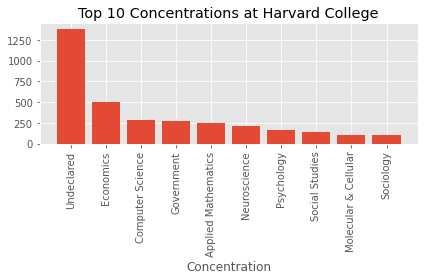

In [ ]:
plt.bar(df_f.head(10)['index'],df_f.head(10)['concentration'])
plt.title('Top 10 Concentrations at Harvard College')
plt.xlabel('Concentration')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('topcon.pdf', dpi=400)

In [ ]:
df_new.describe()

,numMentions
count,5223.000000
mean,1.212330
std,8.690908
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,237.000000


In [ ]:
df_vc = df_new['concentration'].value_counts().reset_index()

In [ ]:
df1 = df_vc.rename({'concentration':'pop'}, axis=1)

In [ ]:
df2 = df1.rename({'index':'concentration'}, axis=1)

In [ ]:
df_sorted = df_new.groupby('concentration')['numMentions'].sum().sort_values(0, ascending=False).reset_index()

In [ ]:
inner_merged = pd.merge(df_sorted, df2)

In [ ]:
inner_merged

,concentration,numMentions,pop
0,Economics,865,497
1,Government,719,276
2,History & Literature,612,79
3,Social Studies,434,139
4,Undeclared,399,1378
...,...,...,...
181,"Government, Classics",0,1
182,"Music, Philosophy",0,1
183,"Music, Classics",0,1
184,"Government, Linguistics",0,1


In [ ]:
dff = df_sorted.head(10).reset_index()

In [ ]:
dff

,index,concentration,numMentions
0,0,Economics,865
1,1,Government,719
2,2,History & Literature,612
3,3,Social Studies,434
4,4,Undeclared,399
5,5,History,399
6,6,Psychology,334
7,7,Applied Mathematics,243
8,8,History & Science,232
9,9,Neuroscience,200


In [ ]:
plt.style.use('ggplot')

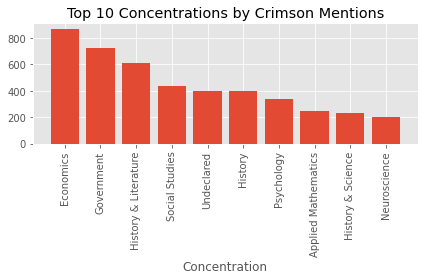

In [ ]:
plt.bar(dff['concentration'],dff['numMentions'])
plt.title('Top 10 Concentrations by Crimson Mentions')
plt.xlabel('Concentration')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('con10.pdf', dpi=400)

In [ ]:
dfff = df_sorted.head(15).reset_index()

In [ ]:
plt.bar(dfff['concentration'],dfff['numMentions'])
plt.title('Top 15 Concentrations by Crimson Mentions')
plt.xlabel('Concentration')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('con15.pdf', dpi=400)

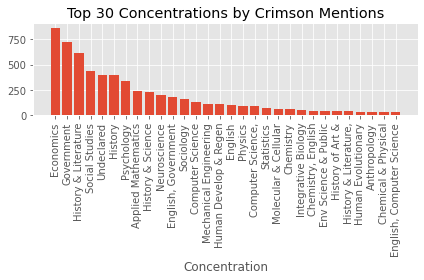

In [ ]:
plt.bar(df_sorted.head(30)['concentration'],df_sorted.head(30)['numMentions'])
plt.title('Top 30 Concentrations by Crimson Mentions')
plt.xlabel('Concentration')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('con30.pdf', dpi=400)

In [ ]:
inner_merged.head()

,concentration,numMentions,pop
0,Economics,865,497
1,Government,719,276
2,History & Literature,612,79
3,Social Studies,434,139
4,Undeclared,399,1378


In [ ]:
inner_merged['ctrl'] = inner_merged['numMentions'] / inner_merged['pop']

In [ ]:
new = inner_merged.sort_values(by='ctrl', ascending=False).reset_index()

In [ ]:
new.head()

,index,concentration,numMentions,pop,ctrl
0,10,"English, Government",183,2,91.5
1,29,"English, Computer Science",28,1,28.0
2,31,"English, South Asian",18,1,18.0
3,33,"Neuroscience,",17,1,17.0
4,22,"Chemistry, English",45,3,15.0


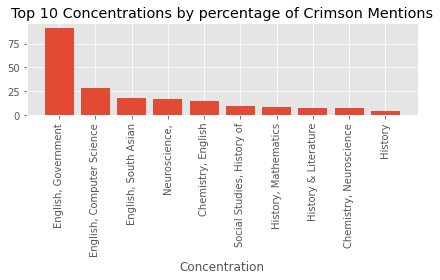

In [ ]:
plt.bar(new.head(10)['concentration'],new.head(10)['ctrl'])
plt.title('Top 10 Concentrations by percentage of Crimson Mentions')
plt.xlabel('Concentration')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('con_ctrl.pdf', dpi=400)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03080ecf-5a60-4397-b627-61e928cf2273' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>